### **1. Multi-layer Perceptron**

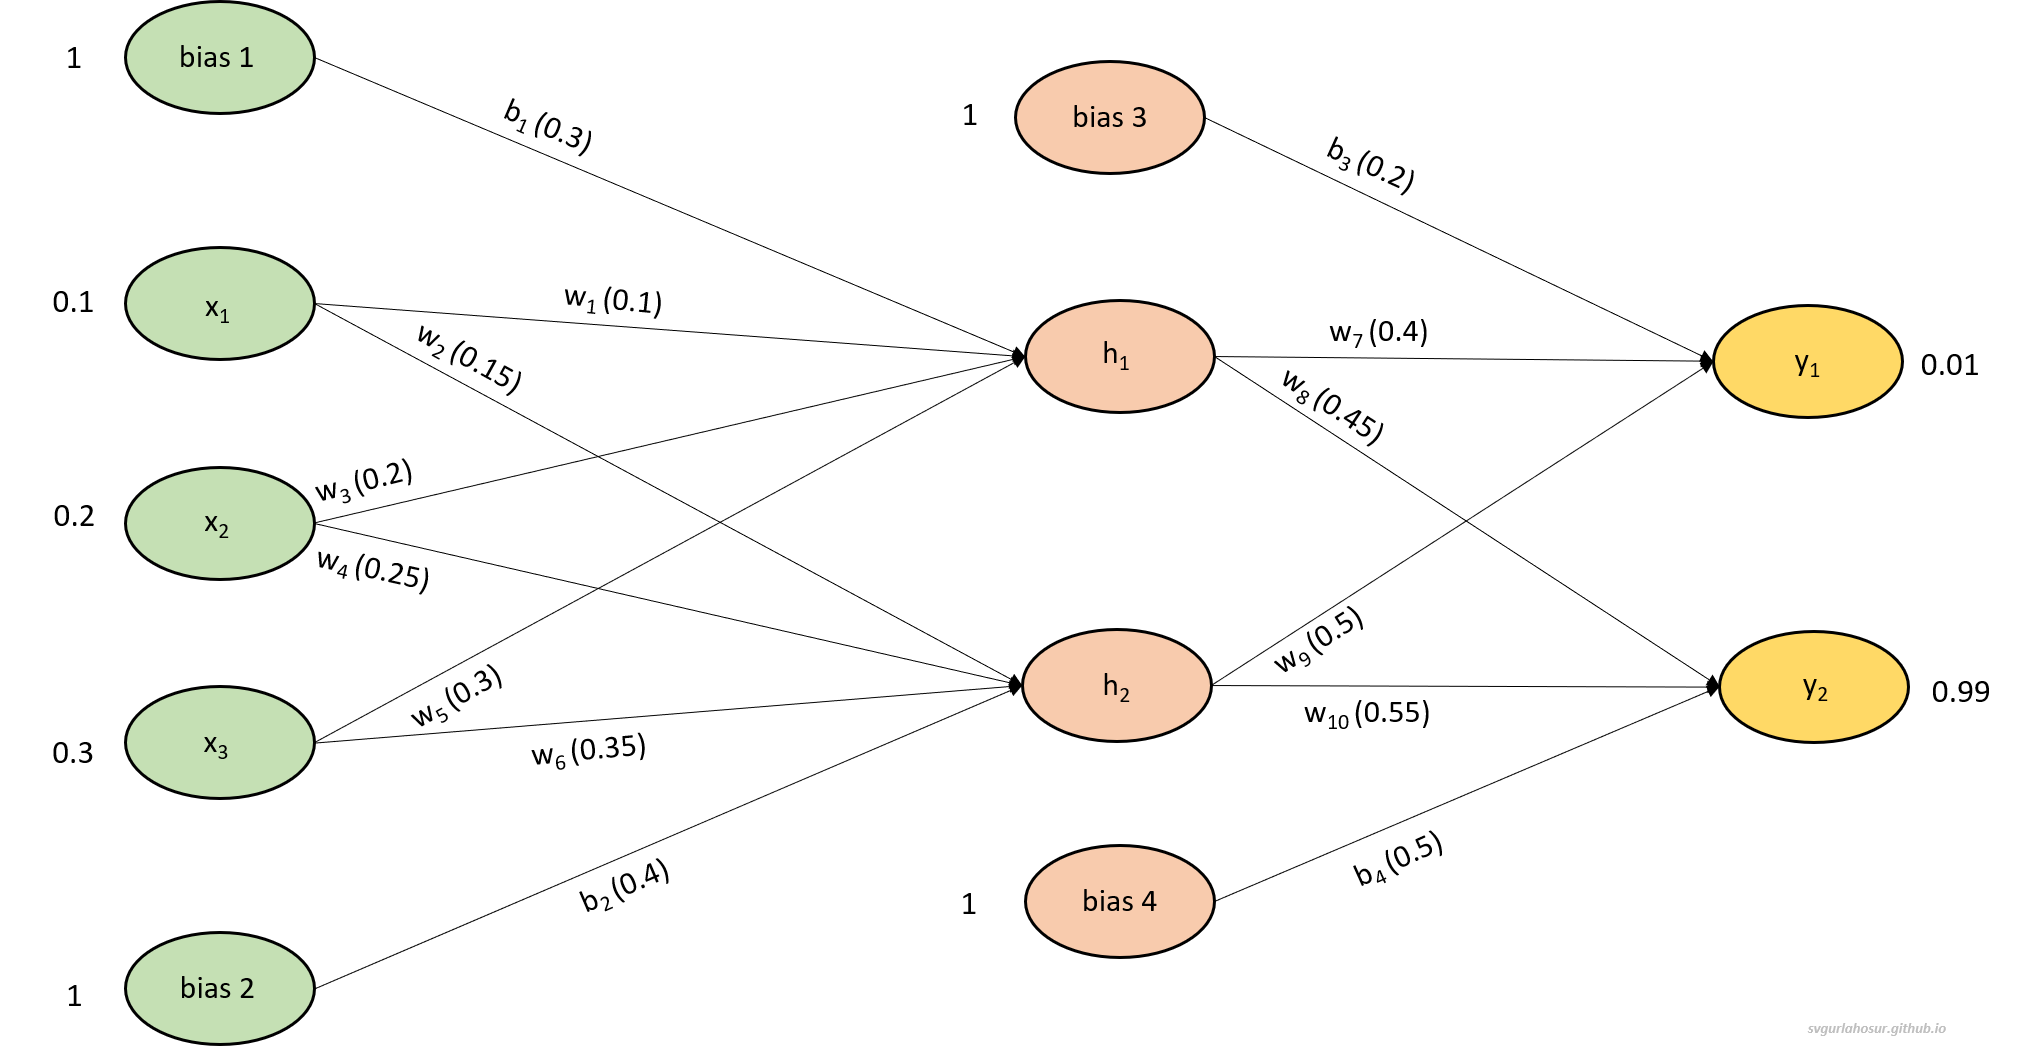

### **2. Training the Multi-layer Perceptron with both biases and weights updation**

Epoch: 50 Error: 0.014331249
Epoch: 100 Error: 0.005898502
Epoch: 150 Error: 0.003500656
Epoch: 200 Error: 0.002409748
Epoch: 250 Error: 0.001798825
Epoch: 300 Error: 0.001413341
Epoch: 350 Error: 0.001150407
Epoch: 400 Error: 0.000960931
Epoch: 450 Error: 0.000818692
Epoch: 500 Error: 0.000708482


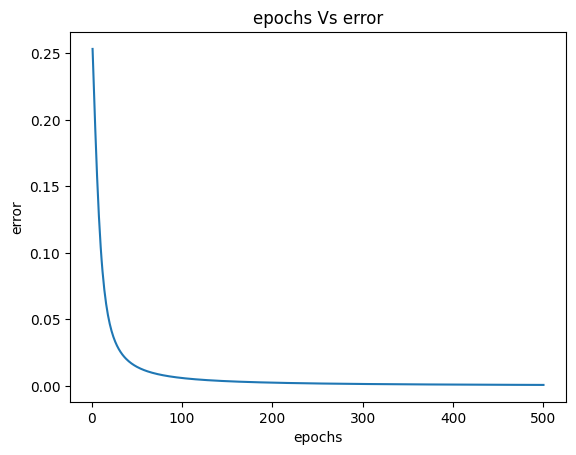

In [1]:
#statically creating the Multi-layer Perceptron (MLP) shown in Figure 1 and initializing the inputs, outputs, weights, and biases
import numpy as np
np.set_printoptions(precision=9)
num_inputs = 3
num_hidden = 2
num_output = 2
inputs = np.array([.1,.2,.3])
targets = np.array([.01,.99])
hidden_weights = np.array([[0.1, 0.15], [0.2, 0.25], [0.3, 0.35]])#weights from all three input neurons to two hidden neurons
output_weights = np.array([[0.4, 0.45], [0.5, 0.55]])#weights from two hidden neurons to two output neurons
hidden_biases = np.array([.3,.4])
output_biases = np.array([.2,.5])

#define the activation function (sigmoid)
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

#define the derivative of the sigmoid activation function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

#set the learning rate for backpropogation
learning_rate = 0.5
#perform the training for 500 iterations
epochs = 500
#list to store error at each epoch
errors_w_b = []

for epoch in range(epochs):
  #forward propagation
  hidden_input = np.dot(inputs, np.array(hidden_weights)) + hidden_biases
  hidden_output = sigmoid(hidden_input)
  output_input = np.dot(hidden_output, np.array(output_weights)) + output_biases
  output = sigmoid(output_input)
  #calculate the total error
  errors = round(0.5 * np.sum((targets - output)**2),9)
  #calculate the gradients for both the layers
  output_delta = -(targets - output) * sigmoid_derivative(output_input)
  hidden_delta = np.dot(output_delta, np.array(output_weights).T) * sigmoid_derivative(hidden_input)
  #update the output layer weights
  output_weights -= learning_rate * np.reshape(hidden_output, (-1, 1)) * np.reshape(output_delta, (1, -1))
  #update the output layer biases
  output_biases -= np.multiply(learning_rate , output_delta)
  #update the hidden layer weights
  hidden_weights -= learning_rate * np.reshape(inputs, (-1, 1)) * np.reshape(hidden_delta, (1, -1))
  #update the hidden layer biases
  hidden_biases -= np.multiply(learning_rate , hidden_delta)
  #copy the current to list for graph plot
  errors_w_b.append(errors)
  #print intermediate error
  if ((epoch+1)%50==0):#print training progress after every 50 epochs and replace 50 by 1 to print progress after every epoch
      print("Epoch:",epoch+1, "Error:",errors)

import matplotlib.pyplot as plt
#load the data for both the axis
x = epochs_num = list(range(1, epochs+1))
y = errors_w_b[:]
#create the plot
plt.plot(x, y)
#customize the plot
plt.xlabel('epochs')
plt.ylabel('error')
plt.title('epochs Vs error')
#show the plot
plt.show()

### **3. Training the Multi-layer Perceptron with only weights updation**

Epoch: 50 Error: 0.039914599
Epoch: 100 Error: 0.016219482
Epoch: 150 Error: 0.009572182
Epoch: 200 Error: 0.006583904
Epoch: 250 Error: 0.00492128
Epoch: 300 Error: 0.003876254
Epoch: 350 Error: 0.003165179
Epoch: 400 Error: 0.002653526
Epoch: 450 Error: 0.002269746
Epoch: 500 Error: 0.001972481


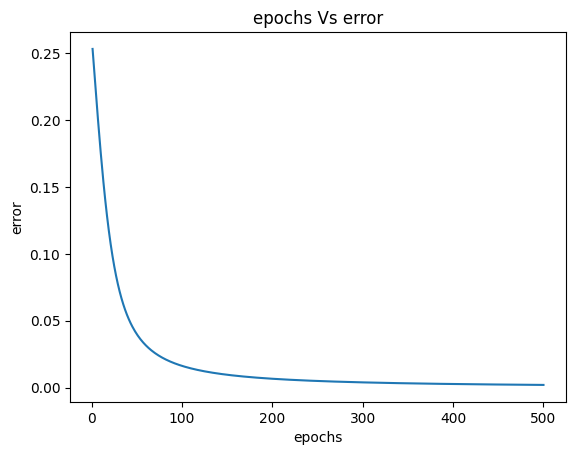

In [2]:
import numpy as np
np.set_printoptions(precision=9)
num_inputs = 3
num_hidden = 2
num_output = 2
inputs = np.array([.1,.2,.3])
targets = np.array([.01,.99])
hidden_weights = np.array([[0.1, 0.15], [0.2, 0.25], [0.3, 0.35]])#weights from all three input neurons to two hidden neurons
output_weights = np.array([[0.4, 0.45], [0.5, 0.55]])#weights from two hidden neurons to two output neurons
hidden_biases = np.array([.3,.4])
output_biases = np.array([.2,.5])

#define the activation function (sigmoid)
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

#define the derivative of the sigmoid activation function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

#set the learning rate for backpropogation
learning_rate = 0.5
#perform the training for 500 iterations
epochs = 500
#list to store error at each epoch
errors_w = []

for epoch in range(epochs):
  #forward propagation
  hidden_input = np.dot(inputs, np.array(hidden_weights)) + hidden_biases
  hidden_output = sigmoid(hidden_input)
  output_input = np.dot(hidden_output, np.array(output_weights)) + output_biases
  output = sigmoid(output_input)
  #calculate the total error
  errors = round(0.5 * np.sum((targets - output)**2),9)
  #calculate the gradients for both the layers
  output_delta = -(targets - output) * sigmoid_derivative(output_input)
  hidden_delta = np.dot(output_delta, np.array(output_weights).T) * sigmoid_derivative(hidden_input)
  #update the output layer weights
  output_weights -= learning_rate * np.reshape(hidden_output, (-1, 1)) * np.reshape(output_delta, (1, -1))
  #update the hidden layer weights
  hidden_weights -= learning_rate * np.reshape(inputs, (-1, 1)) * np.reshape(hidden_delta, (1, -1))
  #copy the current to list for graph plot
  errors_w.append(errors)
  #print intermediate error
  if ((epoch+1)%50==0):#print training progress after every 50 epochs and replace 50 by 1 to print progress after every epoch
      print("Epoch:",epoch+1, "Error:",errors)

import matplotlib.pyplot as plt
#load the data for both the axis
x = epochs_num = list(range(1, epochs+1))
y = errors_w[:]
#create the plot
plt.plot(x, y)
#customize the plot
plt.xlabel('epochs')
plt.ylabel('error')
plt.title('epochs Vs error')
#show the plot
plt.show()

### **4. Analysis on the error obtained during both the methods of training**

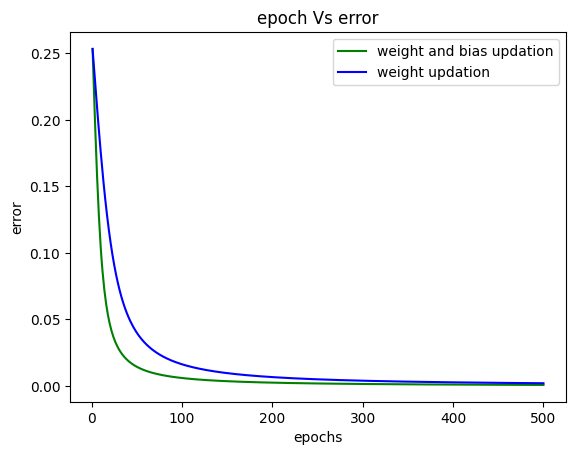



The total error from all epochs with weights and bias updation method is less.


In [3]:
#load data for both the axis
x = epochs_num = list(range(1, epochs+1))
y1 = errors_w_b[:]
y2 = errors_w[:]
plt.plot(x, y1, 'g', label='weight and bias updation')
plt.plot(x, y2, 'b', label='weight updation')
plt.title('epoch Vs error')
plt.xlabel('epochs')
plt.ylabel('error')
plt.legend()
plt.show()
print("\n")
if sum(errors_w_b) < sum(errors_w):
  print("The total error from all epochs with weights and bias updation method is less.")
else:
  print("The total error from all epochs with only weights updation method is less.")